# 모델 구현
### 라이브러리 호출

In [1]:
# 데이터 처리 및 분석
import pandas as pd

# 데이터 전처리 및 변환
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# 불균형 데이터 처리
from imblearn.over_sampling import SMOTE

# 모델링 및 평가
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

# 군집 분석
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 시각화
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# 시각화 스타일 설정
sns.set_theme(style="whitegrid")

# 한글 폰트 설정 (윈도우 기준: 맑은고딕)
matplotlib.rc('font', family='Malgun Gothic')

# 마이너스 기호 깨짐 방지
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
# 데이터 불러오기
df_raw = pd.read_csv("p24_final_data.csv", encoding='utf-8-sig')
df_raw = df_raw.dropna(subset=['소외이진라벨'])

In [3]:
# 모든 변수 추가 

### 모델구현

#### 파생변수 미포함

##### Random Forest

=== Random Forest (기본 파라미터, 공공데이터 포함) ===
              precision    recall  f1-score   support

           0       0.57      0.66      0.61       578
           1       0.81      0.75      0.78      1158

    accuracy                           0.72      1736
   macro avg       0.69      0.71      0.70      1736
weighted avg       0.73      0.72      0.73      1736



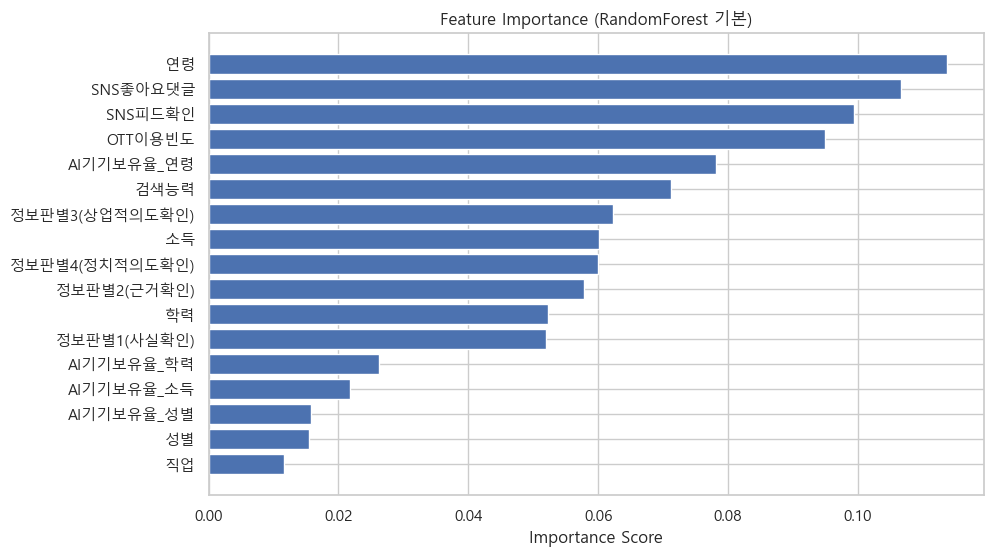

In [4]:
# 데이터 불러오기
df = df_raw.copy()

# X, y 설정
X = df[[
    '성별', '연령', '학력', '직업', '소득', '검색능력',
    '정보판별1(사실확인)', '정보판별2(근거확인)',
    '정보판별3(상업적의도확인)', '정보판별4(정치적의도확인)',
    'SNS피드확인', 'SNS좋아요댓글', 'OTT이용빈도',
    'AI기기보유율_성별', 'AI기기보유율_연령', 'AI기기보유율_소득', 'AI기기보유율_학력'
]]
y = df['소외이진라벨']

# Train-Test 분리
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 결측값 제거
X_train_no_na = X_train.dropna()
y_train_no_na = y_train.loc[X_train_no_na.index]
X_test_no_na = X_test.dropna()
y_test_no_na = y_test.loc[X_test_no_na.index]

# SMOTE 적용
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_no_na, y_train_no_na)

# RandomForest (기본 파라미터 적용)
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model.fit(X_train_resampled, y_train_resampled)
y_pred_rf = rf_model.predict(X_test_no_na)

# 성능평가 출력
print("=== Random Forest (기본 파라미터, 공공데이터 포함) ===")
print(classification_report(y_test_no_na, y_pred_rf))

# AI_Device 변수 중요도 시각화
importances = rf_model.feature_importances_
features = X.columns

# 중요도 내림차순 정렬
sorted_idx = importances.argsort()[::-1]
plt.figure(figsize=(10,6))
plt.barh(range(len(features)), importances[sorted_idx])
plt.yticks(range(len(features)), features[sorted_idx])
plt.xlabel("Importance Score")
plt.title("Feature Importance (RandomForest 기본)")
plt.gca().invert_yaxis()
plt.show()

##### 하이퍼 파라미터

=== Random Forest (튜닝 후) ===
최적 파라미터: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.58      0.66      0.62       578
           1       0.82      0.76      0.79      1158

    accuracy                           0.73      1736
   macro avg       0.70      0.71      0.70      1736
weighted avg       0.74      0.73      0.73      1736


변수 중요도:
           Feature  Importance
1               연령    0.112890
11        SNS좋아요댓글    0.106877
10         SNS피드확인    0.101306
12         OTT이용빈도    0.094268
14      AI기기보유율_연령    0.082361
5             검색능력    0.069563
8   정보판별3(상업적의도확인)    0.061884
4               소득    0.060369
9   정보판별4(정치적의도확인)    0.059010
7      정보판별2(근거확인)    0.058206
6      정보판별1(사실확인)    0.052788
2               학력    0.052644
16      AI기기보유율_학력    0.023337
15      AI기기보유율_소득    0.021631
13      AI기기보유율_성별    0.015618
0               성별    0.015399
3               직업    0.011849


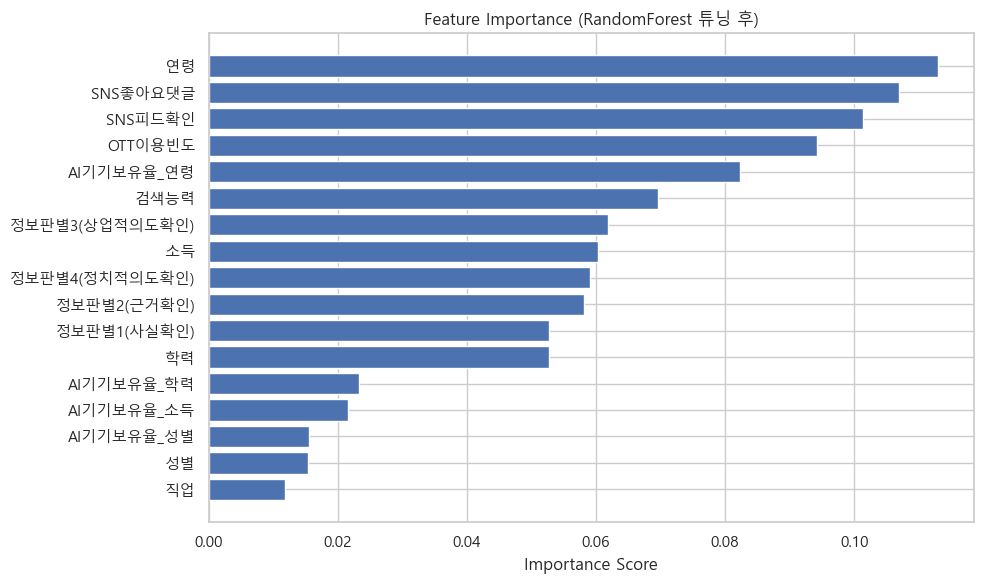

In [5]:
# 데이터 불러오기
df = df_raw.copy()

# X, y 설정
X = df[[
    '성별', '연령', '학력', '직업', '소득', '검색능력',
    '정보판별1(사실확인)', '정보판별2(근거확인)',
    '정보판별3(상업적의도확인)', '정보판별4(정치적의도확인)',
    'SNS피드확인', 'SNS좋아요댓글', 'OTT이용빈도',
    'AI기기보유율_성별', 'AI기기보유율_연령', 'AI기기보유율_소득', 'AI기기보유율_학력'
]]
y = df['소외이진라벨']

# Train-Test 분리
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 결측값 제거
X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]
X_test = X_test.dropna()
y_test = y_test.loc[X_test.index]

# SMOTE 적용
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 하이퍼파라미터 튜닝
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5]
}
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42, class_weight='balanced'),
    param_grid,
    cv=5,
    scoring='f1_macro',
    n_jobs=-1
)
grid_search.fit(X_train_resampled, y_train_resampled)

# 최적 모델 성능 평가
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("=== Random Forest (튜닝 후) ===")
print("최적 파라미터:", grid_search.best_params_)
print(classification_report(y_test, y_pred))

#AI_Device 변수 중요도 시각화 및 출력
importances = best_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 값 출력
print("\n변수 중요도:")
print(importance_df)

# 시각화
plt.figure(figsize=(10,6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel("Importance Score")
plt.title("Feature Importance (RandomForest 튜닝 후)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

#### 파생변수 포함

##### Random Forest

=== Random Forest (기본 파라미터, 공공데이터 포함) ===
              precision    recall  f1-score   support

           0       0.58      0.65      0.61       578
           1       0.82      0.77      0.79      1158

    accuracy                           0.73      1736
   macro avg       0.70      0.71      0.70      1736
weighted avg       0.74      0.73      0.73      1736



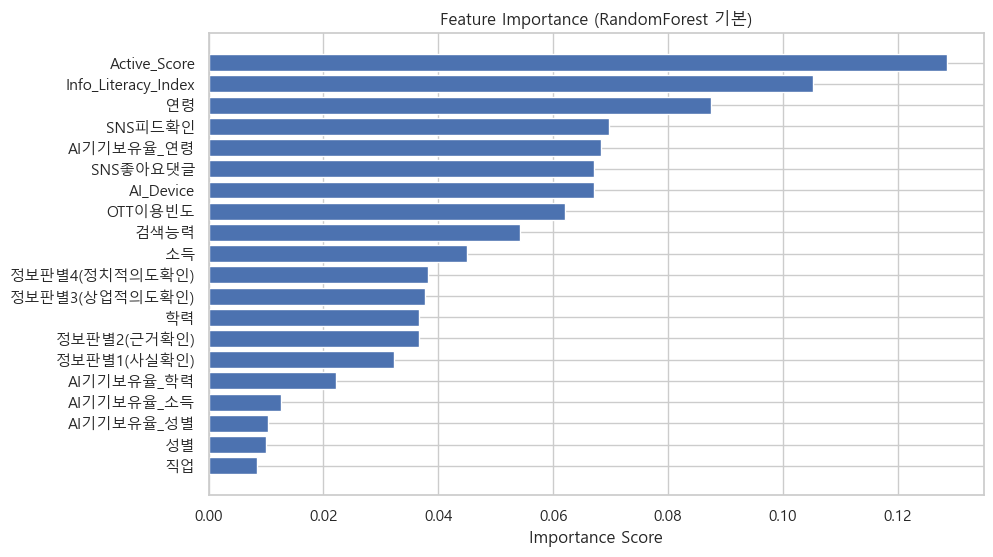

In [6]:
# 데이터 불러오기
df = df_raw.copy()

# X, y 설정
X = df[[
    '성별', '연령', '학력', '직업', '소득', '검색능력',
    '정보판별1(사실확인)', '정보판별2(근거확인)',
    '정보판별3(상업적의도확인)', '정보판별4(정치적의도확인)',
    'SNS피드확인', 'SNS좋아요댓글', 'OTT이용빈도',
    'AI기기보유율_성별', 'AI기기보유율_연령', 'AI기기보유율_소득', 'AI기기보유율_학력',
    'Active_Score', 'Info_Literacy_Index', 'AI_Device'
]]
y = df['소외이진라벨']

# Train-Test 분리
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 결측값 제거
X_train_no_na = X_train.dropna()
y_train_no_na = y_train.loc[X_train_no_na.index]
X_test_no_na = X_test.dropna()
y_test_no_na = y_test.loc[X_test_no_na.index]

# SMOTE 적용
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_no_na, y_train_no_na)

# RandomForest (기본 파라미터 적용)
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model.fit(X_train_resampled, y_train_resampled)
y_pred_rf = rf_model.predict(X_test_no_na)

# 성능평가 출력
print("=== Random Forest (기본 파라미터, 공공데이터 포함) ===")
print(classification_report(y_test_no_na, y_pred_rf))

# AI_Device 변수 중요도 시각화
importances = rf_model.feature_importances_
features = X.columns

# 중요도 내림차순 정렬
sorted_idx = importances.argsort()[::-1]
plt.figure(figsize=(10,6))
plt.barh(range(len(features)), importances[sorted_idx])
plt.yticks(range(len(features)), features[sorted_idx])
plt.xlabel("Importance Score")
plt.title("Feature Importance (RandomForest 기본)")
plt.gca().invert_yaxis()
plt.show()

##### 하이퍼 파라미터 

=== Random Forest (튜닝 후) ===
최적 파라미터: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.58      0.66      0.62       578
           1       0.82      0.76      0.79      1158

    accuracy                           0.73      1736
   macro avg       0.70      0.71      0.70      1736
weighted avg       0.74      0.73      0.73      1736


변수 중요도:
                Feature  Importance
17         Active_Score    0.127148
18  Info_Literacy_Index    0.104594
1                    연령    0.086890
14           AI기기보유율_연령    0.072002
11             SNS좋아요댓글    0.069781
10              SNS피드확인    0.066856
19            AI_Device    0.063117
12              OTT이용빈도    0.062583
5                  검색능력    0.052932
4                    소득    0.044205
2                    학력    0.038837
9        정보판별4(정치적의도확인)    0.038712
8        정보판별3(상업적의도확인)    0.038273
7           정보판별2(근거확인)    0.037405
6           정보판별1(사실확

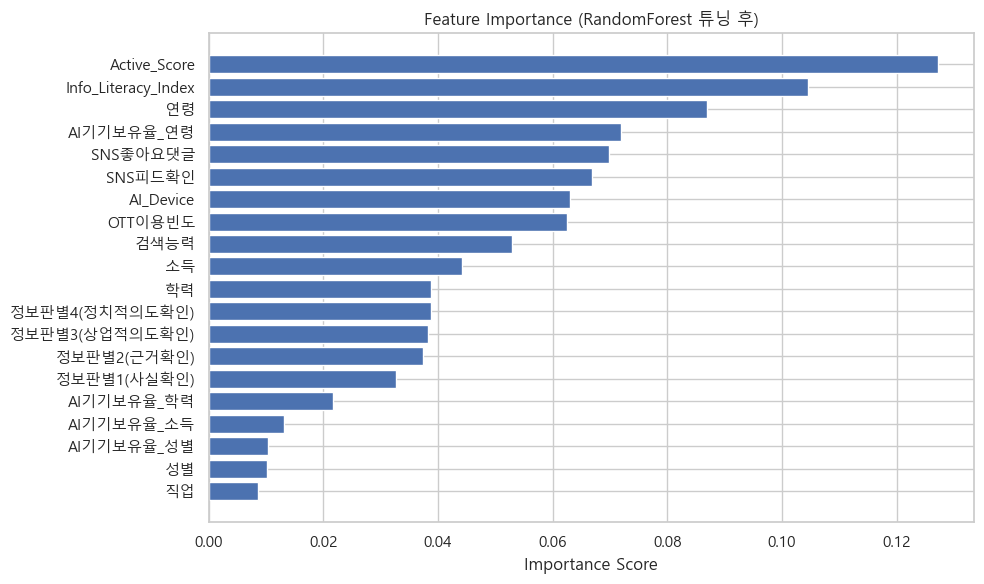

In [7]:
# 데이터 불러오기
df = df_raw.copy()

# X, y 설정
X = df[[
    '성별', '연령', '학력', '직업', '소득', '검색능력',
    '정보판별1(사실확인)', '정보판별2(근거확인)',
    '정보판별3(상업적의도확인)', '정보판별4(정치적의도확인)',
    'SNS피드확인', 'SNS좋아요댓글', 'OTT이용빈도',
    'AI기기보유율_성별', 'AI기기보유율_연령', 'AI기기보유율_소득', 'AI기기보유율_학력',
    'Active_Score', 'Info_Literacy_Index', 'AI_Device'
]]
y = df['소외이진라벨']

# Train-Test 분리
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 결측값 제거
X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]
X_test = X_test.dropna()
y_test = y_test.loc[X_test.index]

# SMOTE 적용
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 하이퍼파라미터 튜닝
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5]
}
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42, class_weight='balanced'),
    param_grid,
    cv=5,
    scoring='f1_macro',
    n_jobs=-1
)
grid_search.fit(X_train_resampled, y_train_resampled)

# 최적 모델 성능 평가
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("=== Random Forest (튜닝 후) ===")
print("최적 파라미터:", grid_search.best_params_)
print(classification_report(y_test, y_pred))

#AI_Device 변수 중요도 시각화 및 출력
importances = best_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 값 출력
print("\n변수 중요도:")
print(importance_df)

# 시각화
plt.figure(figsize=(10,6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel("Importance Score")
plt.title("Feature Importance (RandomForest 튜닝 후)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

##### 전체 정확도는 파생변수를 포함한 모델과 제외한 모델 모두에서 유사하게 73% 수준을 유지하였으며, 구성 변수들 또한 각각 변수 중요도 상위에 고르게 분포하였다.
#####  다만, 디지털 행동 패턴의 구조를 보다 직관적으로 해석하고, 정책적 활용 측면에서 설명력을 강화하기 위해 본 연구에서는 파생변수를 포함한 모델을 최종적으로 채택하였다.

### 시각화

##### 파생변수 이진 분포도

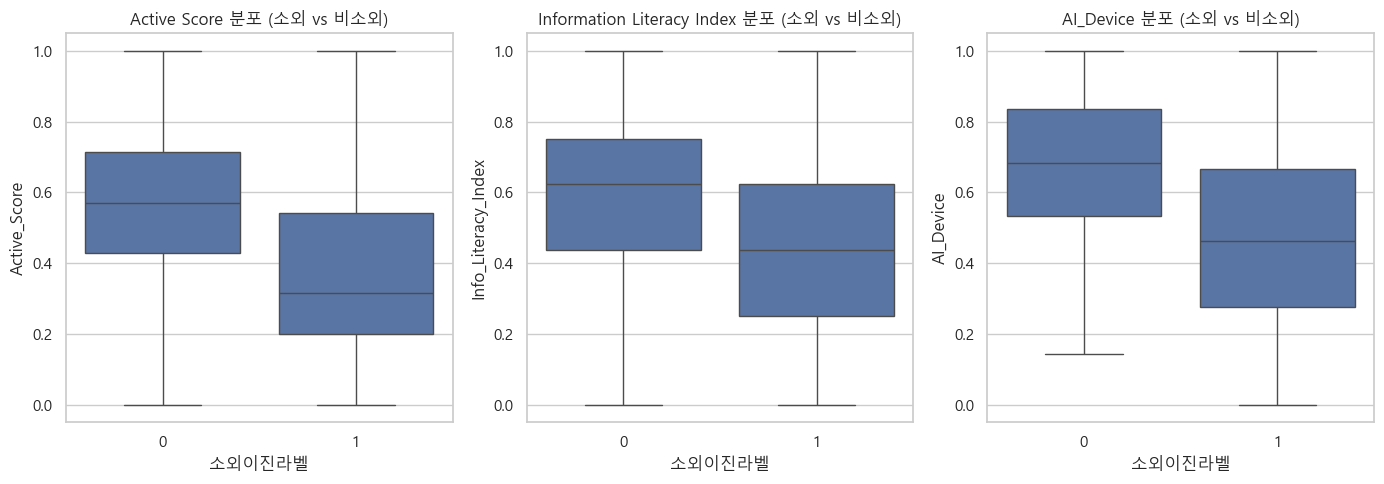

In [8]:
plt.figure(figsize=(14, 5))

# Active_Score
plt.subplot(1, 3, 1)
sns.boxplot(data=df, x='소외이진라벨', y='Active_Score')
plt.title("Active Score 분포 (소외 vs 비소외)")

# Info_Literacy_Index
plt.subplot(1, 3, 2)
sns.boxplot(data=df, x='소외이진라벨', y='Info_Literacy_Index')
plt.title("Information Literacy Index 분포 (소외 vs 비소외)")

# AI_Device
plt.subplot(1, 3, 3)
sns.boxplot(data=df, x='소외이진라벨', y='AI_Device')
plt.title("AI_Device 분포 (소외 vs 비소외)")

plt.tight_layout()
plt.show()

##### 상위 중요 변수 간 상관관계

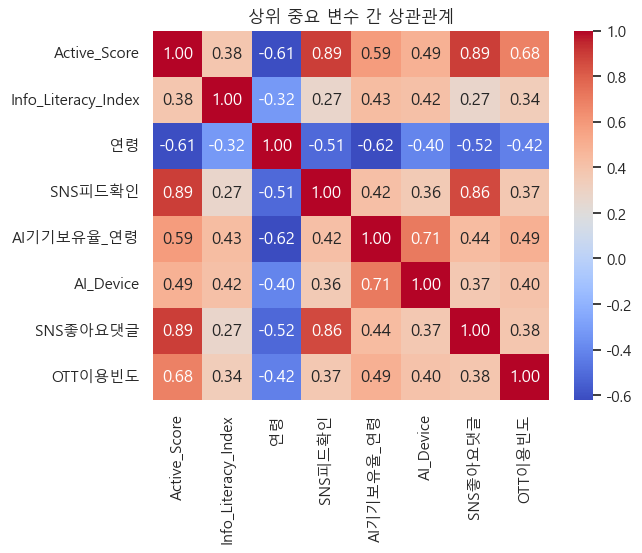

In [9]:
top_features = ['Active_Score', 'Info_Literacy_Index', '연령', 'SNS피드확인',
                'AI기기보유율_연령', 'AI_Device', 'SNS좋아요댓글', 'OTT이용빈도']
sns.heatmap(df[top_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("상위 중요 변수 간 상관관계")
plt.show()


##### PCA 기반 2차원 분포

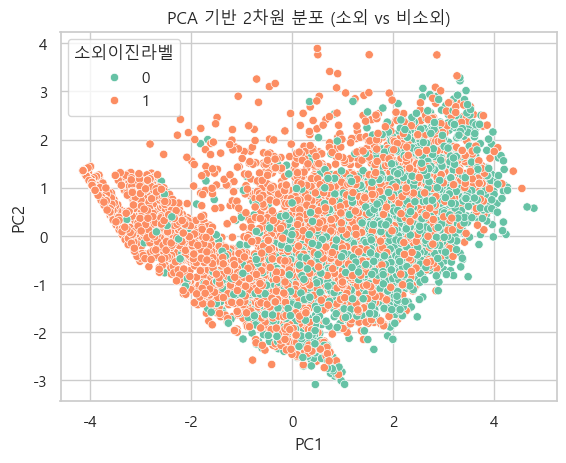

In [10]:
# 필요한 feature만 선택하고 결측 제거
features = ['Active_Score', 'Info_Literacy_Index', '연령', 'SNS피드확인',
            'AI기기보유율_연령', 'AI_Device', 'SNS좋아요댓글', 'OTT이용빈도']
X = df[features].dropna()

# 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

# 라벨도 같은 인덱스 기준으로 맞춰서 넣기
df_pca['소외이진라벨'] = df.loc[X.index, '소외이진라벨'].values

# 시각화
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='소외이진라벨', palette='Set2')
plt.title("PCA 기반 2차원 분포 (소외 vs 비소외)")
plt.show()


##### 예측율

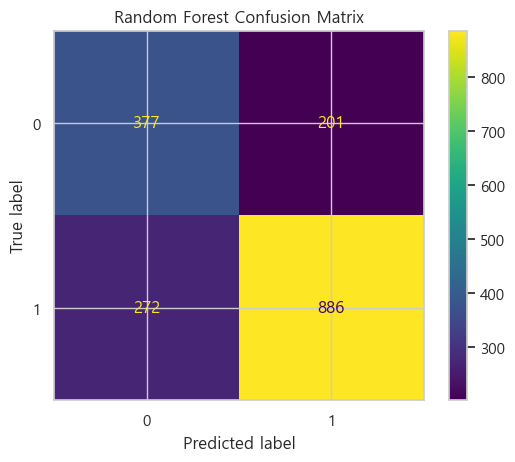

In [11]:
ConfusionMatrixDisplay.from_estimator(rf_model, X_test_no_na, y_test_no_na)
plt.title("Random Forest Confusion Matrix")
plt.show()

### Kmeans

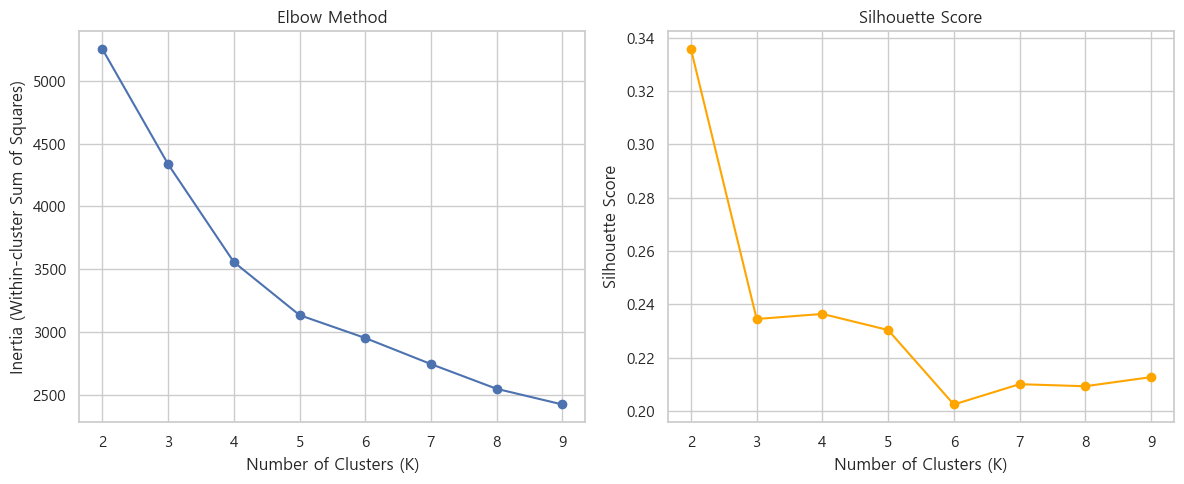

In [12]:
# 데이터 불러오기 및 정규화
df = df_raw.copy()

selected_features = [
    'Active_Score', 'Info_Literacy_Index', 'AI_Device',
    'SNS피드확인', 'SNS좋아요댓글', 'OTT이용빈도', '검색능력',
    '정보판별1(사실확인)', '정보판별2(근거확인)',
    '정보판별3(상업적의도확인)', '정보판별4(정치적의도확인)'
]
df_selected = df[selected_features].dropna()

# 정규화
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df_selected)

# K range 정의
inertias = []
silhouettes = []
K_range = range(2, 10)

for k in K_range:
    model = KMeans(n_clusters=k, random_state=42)
    preds = model.fit_predict(X_scaled)
    inertias.append(model.inertia_)
    silhouettes.append(silhouette_score(X_scaled, preds))

# 결과 시각화
plt.figure(figsize=(12,5))

# Elbow Method
plt.subplot(1, 2, 1)
plt.plot(K_range, inertias, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Within-cluster Sum of Squares)")

# Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(K_range, silhouettes, marker='o', color='orange')
plt.title("Silhouette Score")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")

plt.tight_layout()
plt.show()


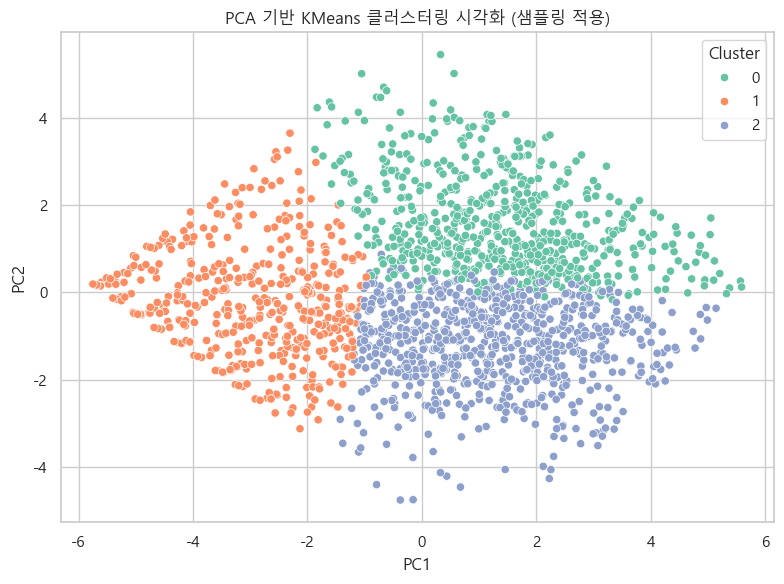

In [13]:
# 데이터 불러오기
df = df_raw.copy()

# 시각화에 사용할 주요 변수 선택
features = [
    'Active_Score', 'Info_Literacy_Index', 'AI_Device',
    'SNS피드확인', 'SNS좋아요댓글', 'OTT이용빈도',
    '정보판별1(사실확인)', '정보판별2(근거확인)',
    '정보판별3(상업적의도확인)', '정보판별4(정치적의도확인)',
    '연령', '소득', '검색능력'
]
df_selected = df[features].dropna()

# 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_selected)

# PCA로 2차원 축소
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# KMeans 클러스터링
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
clusters = kmeans.fit_predict(X_scaled)

# 시각화용 샘플링 (메모리 이슈 방지)
sample_size = 2000 if len(X_pca) > 2000 else len(X_pca)
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = clusters
df_sample = df_pca.sample(n=sample_size, random_state=42)

# 시각화
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_sample, x='PC1', y='PC2', hue='Cluster', palette='Set2')
plt.title("PCA 기반 KMeans 클러스터링 시각화 (샘플링 적용)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()


In [14]:
# 클러스터 정보를 원본 df_selected와 병합
df_selected_clustered = df_selected.copy()
df_selected_clustered['Cluster'] = clusters

# 클러스터별 주요 변수 평균값 확인
cluster_summary = df_selected_clustered.groupby('Cluster')[features].mean().round(2)

# 결과 출력
print("🔍 클러스터별 평균 특성 요약:\n")
print(cluster_summary)


🔍 클러스터별 평균 특성 요약:

         Active_Score  Info_Literacy_Index  AI_Device  SNS피드확인  SNS좋아요댓글  \
Cluster                                                                    
0                0.70                 0.49       0.63     6.77      6.78   
1                0.16                 0.21       0.32     0.28      0.30   
2                0.40                 0.69       0.64     2.08      2.19   

         OTT이용빈도  정보판별1(사실확인)  정보판별2(근거확인)  정보판별3(상업적의도확인)  정보판별4(정치적의도확인)  \
Cluster                                                                      
0           7.21         3.03         2.95            2.94            2.86   
1           3.44         1.96         1.85            1.82            1.79   
2           6.40         3.80         3.80            3.78            3.68   

           연령    소득  검색능력  
Cluster                    
0        4.55  3.92  4.59  
1        7.24  2.74  2.46  
2        5.72  4.66  4.37  


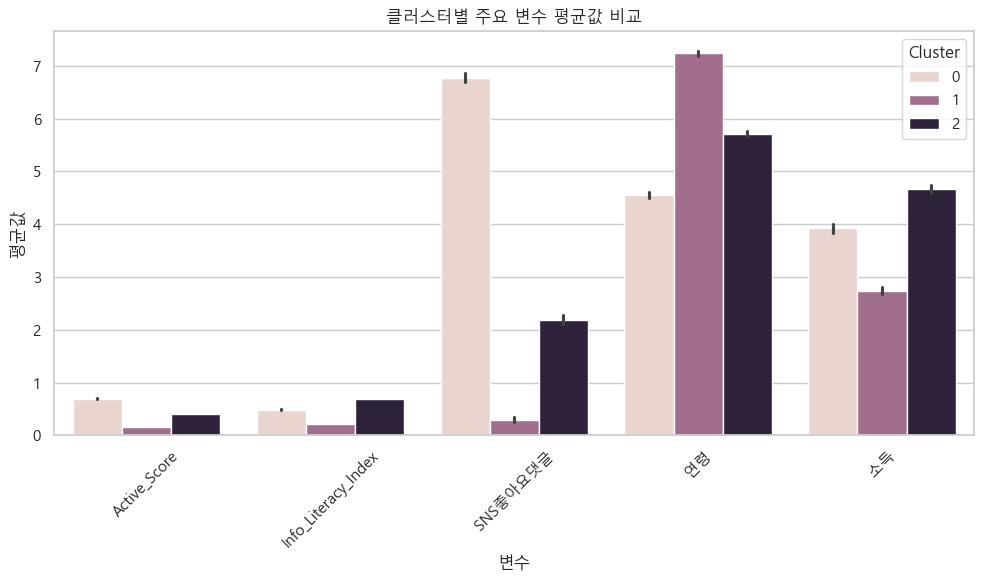

In [15]:
# 시각화할 변수 선택
plot_vars = ['Active_Score', 'Info_Literacy_Index', 'SNS좋아요댓글', '연령', '소득']
plot_vars_1 = ['Active_Score', 'Info_Literacy_Index', 'AI_Device',
             'SNS피드확인', 'SNS좋아요댓글', '연령']

# Melt해서 long-form으로 변환
df_melted = df_selected_clustered[['Cluster'] + plot_vars].melt(id_vars='Cluster')

plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted, x='variable', y='value', hue='Cluster')
plt.title("클러스터별 주요 변수 평균값 비교")
plt.xlabel("변수")
plt.ylabel("평균값")
plt.legend(title='Cluster')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
